**Dataframe for Restaurant and their business_id**

In [275]:
import json
import string as str
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from pandas import DataFrame
from sklearn.feature_extraction import stop_words
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import scikitplot as skplt
import matplotlib.pyplot as plt
import string


bus_id_rest=[]
data_rest={}
bus_id_rest=[]
categories=[]

counter=0
def dataframe_business():
    
    with open('C:/Users/Gautam/Desktop/2nd semester/255/business.json', encoding = "utf8") as f:

        for line in f:
            
            data_rest.update(json.loads(line))
            bus_id_rest.append(data_rest['business_id'])
            categories.append(data_rest['categories'])
    
    result = {'business_id':bus_id_rest,'categories':categories}
    
    return result

result=dataframe_business() #dictinary of business_id and categories           
df= pd.DataFrame.from_dict(result)#dataframe of the above
business_dataframe=df[df['categories'].str.contains('Restaurants', na=False)]

#print('Dataframe for Restaurant and their business_id')
print('\n')
print(business_dataframe.head(5)) 
counter=business_dataframe['business_id'].count()
business_set =set(business_dataframe['business_id'])
print('\n')

print('Number of restaraunts=',business_dataframe['business_id'].count())





               business_id                                         categories
1   QXAEGFB4oINsVuTFxEYKFQ  Specialty Food, Restaurants, Dim Sum, Imported...
2   gnKjwL_1w79qoiV3IC_xQQ                  Sushi Bars, Restaurants, Japanese
11  1Dfx3zM-rW4n-31KeC8sJg  Restaurants, Breakfast & Brunch, Mexican, Taco...
13  fweCYi8FmbJXHCqLnwuk8w         Italian, Restaurants, Pizza, Chicken Wings
17  PZ-LZzSlhSe9utkQYU8pFg                               Restaurants, Italian


Number of restaraunts= 59371


**Loading reviews in a dataframe**

In [276]:
 

data ={}
result={}
review=[]
pos=[]

def load_data():
    
    
    bus_id=[]
    stars=[]
    
    neg=[]
    label=[]
    counter1=0
    bussiness_predicted_reviews = {}
    with open('review.json', encoding = "utf8") as f:
        for line in f:
            counter1=counter1+1
            if(counter1==50000):
                break
            data.update(json.loads(line))
            if not set([data['business_id']]).isdisjoint(business_set):
                review.append(data['text'])
                bus_id.append(data['business_id'])
                stars.append(data['stars'])
                pos.append(0)
                neg.append(0)
                label.append(0)
    result = {'business_id':bus_id,'text':review,'stars':stars,'positive':pos,'negative':neg,'label':label}
    #print(review)
    return result


r=load_data()
D = pd.DataFrame.from_dict(r)
D.head()


,business_id,text,stars,positive,negative,label
0,ikCg8xy5JIg_NGPx-MSIDA,Went in for a lunch. Steak sandwich was delici...,5.0,0,0,0
1,eU_713ec6fTGNO4BegRaww,I'll be the first to admit that I was not exci...,4.0,0,0,0
2,3fw2X5bZYeW9xCz_zGhOHg,Tracy dessert had a big name in Hong Kong and ...,3.0,0,0,0
3,zvO-PJCpNk4fgAVUnExYAA,This place has gone down hill. Clearly they h...,1.0,0,0,0
4,8mIrX_LrOnAqWsB5JrOojQ,"Like walking back in time, every Saturday morn...",4.0,0,0,0


**Counting the number of positive and negative words in each review**


In [277]:
def label_data():  
    file1=open("negative_words.txt", 'r') 
    words = re.findall(r"([a-zA-Z\-]+)", file1.read())
    words=set(words)
    negative=0
    neg=[]
    
    for sentence in review:
        negative=0
        for word_review in sentence.split():
            for i in words:
                if(i==word_review.lower()):        
                    negative+=1  
        neg.append(negative)        
    D['negative']=neg
    
    
    file2=open("positive_words.txt", 'r') 
    words = re.findall(r"([a-zA-Z\-]+)", file2.read())
    words=set(words)
    
    positive=0
    
    pos=[]
    for sentence in review:
        positive=0
        for word_review in sentence.split():
            
            
            for i in words:
                
                if(i.lower()==word_review.lower()):
                    
                    
                    positive+=1
        pos.append(positive)
    D['positive']=pos

    
    label=[]
    
    length=(len(pos))
    for i in range(0,length):
        if(pos[i]>neg[i]):
            label.append(+1)
            
        elif(pos[i]<neg[i]):
            label.append(-1)
            
        else:
            label.append(0)
            
    D['label']=label
    

label_data()
D.head()        
       

,business_id,text,stars,positive,negative,label
0,ikCg8xy5JIg_NGPx-MSIDA,Went in for a lunch. Steak sandwich was delici...,5.0,12,0,1
1,eU_713ec6fTGNO4BegRaww,I'll be the first to admit that I was not exci...,4.0,23,6,1
2,3fw2X5bZYeW9xCz_zGhOHg,Tracy dessert had a big name in Hong Kong and ...,3.0,18,3,1
3,zvO-PJCpNk4fgAVUnExYAA,This place has gone down hill. Clearly they h...,1.0,0,5,-1
4,8mIrX_LrOnAqWsB5JrOojQ,"Like walking back in time, every Saturday morn...",4.0,6,1,1


**Removing punctuation and stop words fro the reviews**

In [278]:

def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stop_words.ENGLISH_STOP_WORDS]

In [279]:
X = D['text']
y = D['label']

In [280]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

X = bow_transformer.transform(X)

**Using MultinomialNB to predict the reviews**

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

confusion_matrix_nb=confusion_matrix(y_test, preds)
print(confusion_matrix_nb)
print(classification_report(y_test, preds))
skplt.metrics.plot_confusion_matrix(y_test,preds,normalize=False)
plt.show()

[[  21    2  535]
 [   8   25  562]
 [  20   42 8375]]
             precision    recall  f1-score   support

         -1       0.43      0.04      0.07       558
          0       0.36      0.04      0.08       595
          1       0.88      0.99      0.94      8437

avg / total       0.83      0.88      0.83      9590



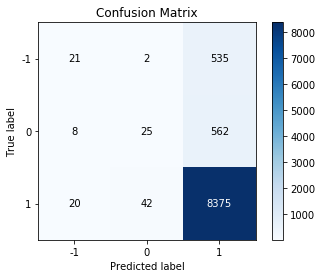

In [282]:
confusion_matrix_nb=confusion_matrix(y_test, preds)
print(confusion_matrix_nb)
print(classification_report(y_test, preds))
skplt.metrics.plot_confusion_matrix(y_test,preds,normalize=False)
plt.show()

**Cross Validation using MultinomialNB**

In [283]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X_train, y_train, cv=5)
print('Cross Validation scores after using MultinomialNB=',scores)

Cross Validation scores after using MultinomialNB= [0.87600536 0.87756926 0.87798883 0.87751453 0.87907912]


**Using SGDClassifier to predict reviews**

[[ 194   82  282]
 [  76   79  440]
 [ 176  193 8068]]
             precision    recall  f1-score   support

         -1       0.43      0.35      0.39       558
          0       0.22      0.13      0.17       595
          1       0.92      0.96      0.94      8437

avg / total       0.85      0.87      0.86      9590



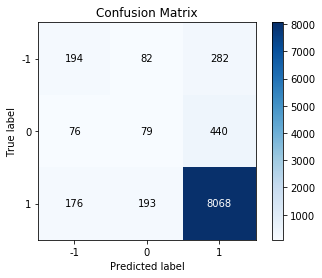

In [284]:
import numpy as np
from sklearn import linear_model

clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
confusion_matrix_clf=confusion_matrix(y_test, preds)
print(confusion_matrix_clf)
print(classification_report(y_test, preds))
skplt.metrics.plot_confusion_matrix(y_test,preds,normalize=False)
plt.show()


**Cross Validation using SGDClassifier**

In [285]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X_train, y_train, cv=5)
print('Cross Validation scores after using SGDClassifier=',scores)

Cross Validation scores after using SGDClassifier= [0.87600536 0.87756926 0.87798883 0.87751453 0.87907912]


In [286]:
yelp_data = D.groupby('business_id', as_index=False).agg({"label": "mean"})
misclassified=0



In [287]:

business={}
final={}
bus_id_final=[]
stars_final=[]

counter=0
def dataframe_business():
    with open('business.json', encoding = "utf8") as f:

        for line in f:
            counter=0
            
            business.update(json.loads(line))
            bus_id_final.append(business['business_id'])
            stars_final.append(business['stars'])
            counter+=1
        result = {'business_id':bus_id_final,'stars':stars_final}

        dataframe=pd.DataFrame.from_dict(result)
        return result
        

        

In [288]:
res=dataframe_business()
dataframe = pd.DataFrame.from_dict(res)


In [289]:

final=pd.merge(dataframe,yelp_data,on=['business_id'])#x=D y=yelp_data
length=len(final)


for i in range(0,length):
    
    if(final.iloc[i]['label']==1 and final.iloc[i]['stars']<=3):
        misclassified=misclassified+1
       
        
    elif(final.iloc[i]['label']==0 and final.iloc[i]['stars']!=3):
         misclassified=misclassified+1
         
         
    elif(final.iloc[i]['label']==-1 and final.iloc[i]['stars']>=3):
         misclassified=misclassified+1
         
         
print('Out of {} examples {} are misclassified'.format(length,misclassified))



Out of 4104 examples 975 are misclassified


**Instances of Positive Reviews-Business_id,Given_stars,Predicted label**

In [290]:
pos_cnt=0

for i in range(0,100):
    if(final.iloc[i]['label']==1 and final.iloc[i]['stars']>=3):
        print(final.iloc[i]['business_id'],final.iloc[i]['stars'],final.iloc[i]['label'])
        if(pos_cnt==5):
            break
        pos_cnt+=1


gnKjwL_1w79qoiV3IC_xQQ 4.0 1.0
fweCYi8FmbJXHCqLnwuk8w 4.0 1.0
1RHY4K3BD22FK7Cfftn8Mg 4.0 1.0
NDuUMJfrWk52RA-H-OtrpA 3.0 1.0
BvYU3jvGd0TJ7IyZdfiN2Q 3.5 1.0
_J_x_RaYTqAqAuCwgRhnRQ 3.0 1.0


**Instances of Negative Reviews-Business_id,Given-stars,Predicted label**

In [292]:

neg_cnt=0
for i in range(0,1000):
    if(final.iloc[i]['label']==(-1) and final.iloc[i]['stars']<3):
        print(final.iloc[i]['business_id'],final.iloc[i]['stars'],final.iloc[i]['label'])
        if(neg_cnt==5):
            break
        neg_cnt+=1


emyCP3Ry2SbpNrwRAtm9PQ 2.5 -1.0
5DLxa3EQQykWFdIJ-KU5jg 2.5 -1.0
zLHOG9ty0OcXSQ6iy2BwwA 2.0 -1.0
rDTCvOrVYN9USxyB-fNHyw 2.5 -1.0
2uAicR2Gel9BMy7jyYUcjw 1.5 -1.0


**Instances of Neutral Reviews-Business_id,Given-stars,Predicted label**

In [293]:
neu_cnt=0
for i in range(0,500):
    if(final.iloc[i]['label']==0 and final.iloc[i]['stars']==3):
        print(final.iloc[i]['business_id'],final.iloc[i]['stars'],final.iloc[i]['label'])
        if(neu_cnt==5):
            break
        neu_cnt+=1


-jdNqqzF1Dbve04oEd4jww 3.0 0.0
UmFty_GxdqVe35apYnmGbw 3.0 0.0
Z3UBeP5EoKIXIDmEdA3JmQ 3.0 0.0
CnWb3k8tUaxLZfDoYrpagA 3.0 0.0
QJMRAjCIuqrHGmeAZeYzOQ 3.0 0.0
VIsPmeZBMLkgbgw4UqCjUQ 3.0 0.0


**Instances of Misclassified Reviews-Business_id,Given-stars,Predicted label**

In [294]:
misclassified_cnt=0

for i in range(0,100):
    if(final.iloc[i]['label']==1 and final.iloc[i]['stars']<=3):
        print(final.iloc[i]['business_id'],final.iloc[i]['stars'],final.iloc[i]['label'])
        misclassified_cnt+=1
        
    elif(final.iloc[i]['label']==-1 and final.iloc[i]['stars']>=3):
        print(final.iloc[i]['business_id'],final.iloc[i]['stars'],final.iloc[i]['label'])
        misclassified_cnt+=1
        
    elif(final.iloc[i]['label']==0 and final.iloc[i]['stars']!=3):
        print(final.iloc[i]['business_id'],final.iloc[i]['stars'],final.iloc[i]['label'])
        misclassified_cnt+=1
        
    if(misclassified_cnt==5):
        break
    
        

PZ-LZzSlhSe9utkQYU8pFg 4.0 0.0
NDuUMJfrWk52RA-H-OtrpA 3.0 1.0
_J_x_RaYTqAqAuCwgRhnRQ 3.0 1.0
kANF0dbeoW34s2vwh6Umfw 2.0 1.0
gyFYZV4b_9TxG1ulQNi0Ig 2.0 1.0


**Example of correctly classified Review**

In [271]:
#correctly classified
positive_review = D['text'][60]
print(positive_review)
print('\n')
positive_review_transformed = bow_transformer.transform([positive_review])
print('Prediction',nb.predict(positive_review_transformed)[0])

This place is quite possibly my favorite restaurant in Phoenix. 

My favorites are the Chicken Scarpariello, the pizza and the Sangria. My wife can't decide between four dishes. Our daughter loves the Penne ala Vodka, Lasagna, or Ravioli.

Mario and his sons work hard to please and we've never had a bad meal here. I've seen them bend over backwards to try and take care of obvious jerks. 

Plus to top it off, when local school invited local pizza places to present to a class on making pizza and recycling issues, Mario came and talked to the kids as if they were adults. All the other places treated it as a marketing event and brought coupons. 

Get the idea? It's all good at this neighborhood gem!


Prediction 1


**Example of a misclassified review**

In [272]:
#False
negative_review = D['text'][59]
print(negative_review)
print('\n')
negative_review_transformed = bow_transformer.transform([negative_review])
print(nb.predict(negative_review_transformed)[0])

I was told so many great things about this place but my entire experience was awful. The food wasn't very good, way too greasy. My fries were luke warm and my tray was literally covered in grease. I needed about 50 napkins and a shower after that. The service was pretty awful too. I can't believe I paid $14 for a small meal with no extra fixings. On national cheeseburger day of all days too. Such a disappointment and I've never gone back since. Best thing about it was the soda, but that's pretty difficult to mess up.


1


In [104]:
#False
negative_review = D['text'][500]
print(negative_review)
negative_review_transformed = bow_transformer.transform([negative_review])
print(nb.predict(negative_review_transformed)[0])

Being a big Laguna Hills OHOP fan, I was disappointed when I visited the Scottsdale AZ location. It felt like a completely different restaurant.

First off--cash only. Wasn't ready for that. Luckily, they have an ATM onsite.

Secondly, they really nerfed the size of the Dutch Baby here. I worked up my friends at how awesome and overwhelmingly large the Dutch Baby is (and that you could share it with two people), but it was a disappointment. It was bit dry, almost burnt and stale tasting.

Third, I felt very rushed. I know that there is a long line, but they were really pushy about cleaning up our plates immediately after we finished and it made for an uncomfortable eating experience.

All in all, there is little to distinguish this place from an IHOP.
1
